# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
weather_df = pd.DataFrame({"City" : cities})
weather_df['Cloudiness'] = ""
weather_df['Country'] = ""
weather_df['Date'] = ""
weather_df['Humidity'] = ""
weather_df['Lat'] = ""
weather_df['Lng'] = ""
weather_df['Max Temp'] = ""
weather_df['Wind Speed'] = ""

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,,,,,,,,
1,ushuaia,,,,,,,,
2,santa clara,,,,,,,,
3,taolanaro,,,,,,,,
4,sebezh,,,,,,,,


In [18]:
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}

base_url = "https://api.openweathermap.org/data/2.5/weather?"
params = {
    "appid": weather_api_key,
    "units": "imperial"
}

for index, row in weather_df.iterrows():

    city = row['City']

    print(f"Retrieving Results for record {index} of {len(cities)}: {city}.")

    params['q'] = city

    response = requests.get(base_url, params=params).json()

    try:
        weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index, 'Country'] = response['sys']['country']
        weather_df.loc[index, 'Date'] = response['dt']
        weather_df.loc[index, 'Humidity'] = response['main']['humidity']
        weather_df.loc[index, 'Lat'] = response['coord']['lat']
        weather_df.loc[index, 'Lng'] = response['coord']['lon']
        weather_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        weather_df.loc[index, 'Wind Speed'] = response['wind']['speed']

    except (KeyError, IndexError):
        print("City not found. Skipping...")

print("Data Retrieval Complete!")

cord 273 of 641: novikovo.
Retrieving Results for record 274 of 641: alenquer.
Retrieving Results for record 275 of 641: torbay.
Retrieving Results for record 276 of 641: tidore.
City not found. Skipping...
Retrieving Results for record 277 of 641: souillac.
Retrieving Results for record 278 of 641: kaitangata.
Retrieving Results for record 279 of 641: jati.
Retrieving Results for record 280 of 641: atasu.
Retrieving Results for record 281 of 641: samusu.
City not found. Skipping...
Retrieving Results for record 282 of 641: meulaboh.
Retrieving Results for record 283 of 641: tongzi.
Retrieving Results for record 284 of 641: soller.
Retrieving Results for record 285 of 641: arraial do cabo.
Retrieving Results for record 286 of 641: bonfim.
Retrieving Results for record 287 of 641: marsa matruh.
Retrieving Results for record 288 of 641: verkhnyaya inta.
Retrieving Results for record 289 of 641: yellowknife.
Retrieving Results for record 290 of 641: vestmannaeyjar.
Retrieving Results for 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
weather_df.replace('', np.nan, inplace=True)
weather_df.dropna(axis=0, how='any', inplace=True)

weather_df.to_csv("output_data/cities.csv")

In [20]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,23.0,PF,1.584493e+09,79.0,-23.12,-134.97,80.67,13.29
1,ushuaia,40.0,AR,1.584493e+09,47.0,-54.80,-68.30,55.40,21.92
2,santa clara,20.0,CU,1.584493e+09,78.0,22.40,-79.97,80.60,12.75
4,sebezh,78.0,RU,1.584493e+09,89.0,56.30,28.47,35.04,8.99
5,itarema,86.0,BR,1.584493e+09,88.0,-2.92,-39.92,76.39,3.80


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [21]:
def date_converter(unixtime):
    formatted_date_string = datetime.utcfromtimestamp(unixtime).strftime('%m/%d/%y')

    return formatted_date_string

data_collection_date = date_converter(weather_df.get_value(0, 'Date'))


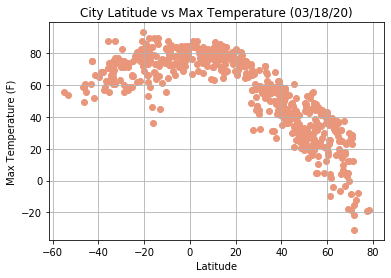

In [34]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], c='darksalmon')
plt.title(f"City Latitude vs Max Temperature ({data_collection_date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("output_data/Latitude vs Max Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

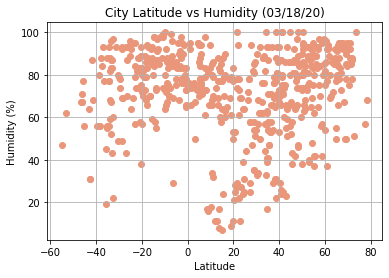

In [23]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], c='darksalmon')
plt.title(f"City Latitude vs Humidity ({data_collection_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("output_data/Latitude vs Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

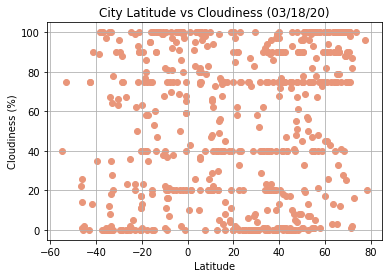

In [24]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], c='darksalmon')
plt.title(f"City Latitude vs Cloudiness ({data_collection_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("output_data/Latitude vs Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

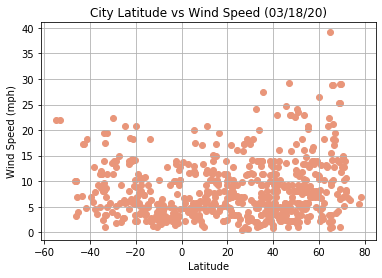

In [25]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], c='darksalmon')
plt.title(f"City Latitude vs Wind Speed ({data_collection_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("output_data/Latitude vs Wind Speed.png")
plt.show()

## Linear Regression

In [26]:
# OPTIONAL: Create a function to create Linear Regression plots


In [27]:
# Create Northern and Southern Hemisphere DataFrames
north_weather_df = weather_df[weather_df['Lat'] >= 0]
south_weather_df = weather_df[weather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is -0.9


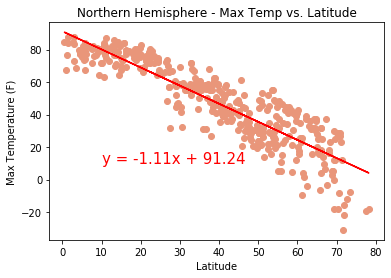

In [31]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather_df['Lat'], north_weather_df['Max Temp'])
regress_values = north_weather_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is {round(rvalue,2)}")

plt.scatter(north_weather_df['Lat'], north_weather_df['Max Temp'], c='darksalmon')
plt.plot(north_weather_df['Lat'], regress_values, "r-")
plt.annotate(line_eq, (10,10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("output_data/Northern Hemisphere - Latitude vs Max Temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.59


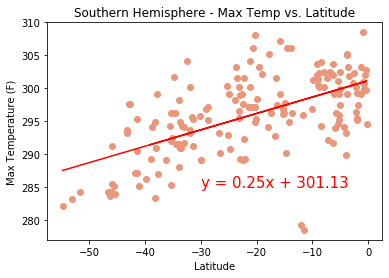

In [51]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather_df['Lat'], south_weather_df['Max Temp'])
regress_values = south_weather_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is {round(rvalue,2)}")

plt.scatter(south_weather_df['Lat'], south_weather_df['Max Temp'], c='darksalmon')
plt.plot(south_weather_df['Lat'], regress_values, "r-")
plt.annotate(line_eq, (-30,285), fontsize=15, color="red")
plt.title("Southern Hemisphere - Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("output_data/Southern Hemisphere - Latitude vs Max Temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.26


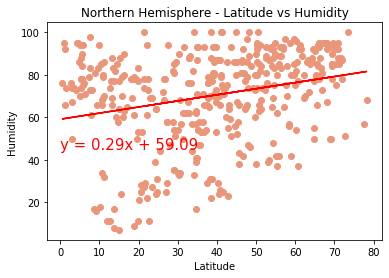

In [40]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather_df['Lat'], north_weather_df['Humidity'])
regress_values = north_weather_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is {round(rvalue,2)}")

plt.scatter(north_weather_df['Lat'], north_weather_df['Humidity'], c='darksalmon')
plt.plot(north_weather_df['Lat'], regress_values, "r-")
plt.annotate(line_eq, (0,45), fontsize=15, color="red")
plt.title("Northern Hemisphere - Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("output_data/Northern Hemisphere - Latitude vs Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.33


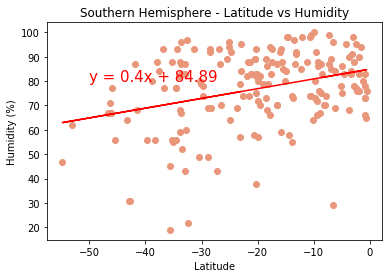

In [44]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather_df['Lat'], south_weather_df['Humidity'])
regress_values = south_weather_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is {round(rvalue,2)}")

plt.scatter(south_weather_df['Lat'], south_weather_df['Humidity'], c='darksalmon')
plt.plot(south_weather_df['Lat'], regress_values, "r-")
plt.annotate(line_eq, (-50,80), fontsize=15, color="red")
plt.title("Southern Hemisphere - Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("output_data/Southern Hemisphere - Latitude vs Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.17


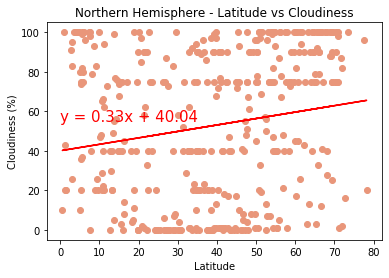

In [48]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather_df['Lat'], north_weather_df['Cloudiness'])
regress_values = north_weather_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is {round(rvalue,2)}")

plt.scatter(north_weather_df['Lat'], north_weather_df['Cloudiness'], c='darksalmon')
plt.plot(north_weather_df['Lat'], regress_values, "r-")
plt.annotate(line_eq, (0,55), fontsize=15, color="red")
plt.title("Northern Hemisphere - Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/Northern Hemisphere - Latitude vs Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.29


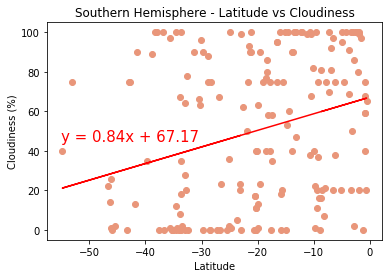

In [52]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather_df['Lat'], south_weather_df['Cloudiness'])
regress_values = south_weather_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is {round(rvalue,2)}")

plt.scatter(south_weather_df['Lat'], south_weather_df['Cloudiness'], c='darksalmon')
plt.plot(south_weather_df['Lat'], regress_values, "r-")
plt.annotate(line_eq, (-55,45), fontsize=15, color="red")
plt.title("Southern Hemisphere - Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/Southern Hemisphere - Latitude vs Cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.2


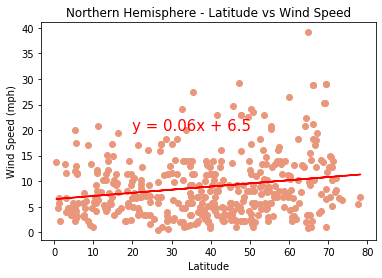

In [55]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather_df['Lat'], north_weather_df['Wind Speed'])
regress_values = north_weather_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is {round(rvalue,2)}")

plt.scatter(north_weather_df['Lat'], north_weather_df['Wind Speed'], c='darksalmon')
plt.plot(north_weather_df['Lat'], regress_values, "r-")
plt.annotate(line_eq, (20,20), fontsize=15, color="red")
plt.title("Northern Hemisphere - Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data/Northern Hemisphere - Latitude vs Wind Speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is -0.39


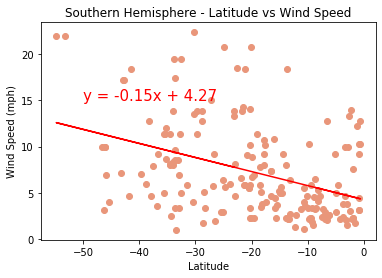

In [58]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather_df['Lat'], south_weather_df['Wind Speed'])
regress_values = south_weather_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is {round(rvalue,2)}")

plt.scatter(south_weather_df['Lat'], south_weather_df['Wind Speed'], c='darksalmon')
plt.plot(south_weather_df['Lat'], regress_values, "r-")
plt.annotate(line_eq, (-50,15), fontsize=15, color="red")
plt.title("Southern Hemisphere - Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data/Southern Hemisphere - Latitude vs Wind Speed.png")
plt.show()